<h1>Predicting Diamond Prices</h1>
<h2>Phase 1: Data Preparation & Visualisation</h2>
<h4>Group Name: Group 15</h4>
<h5>Name: Evelyn Lie (s3951140)</h5>
<h5>Name: Edward Lim Padmajaya (s3957503)</h5>
<h5>Name: Go Chee Kin (s3955624)</h5>
<h5>Name: Frandom Leo Inovejas (s3923193)</h5>

<h2>Table Of Contents</h2>
<ul>
    <li>Introduction</li>
        <ul style = "list-style-type:square">
            <li>Phase 1 Summary</li>
            <li>Report Overview</li>
            <li>Overview of Methodology</li>
        </ul>
    <li>Statistical Modelling</li>
        <ul style = "list-style-type:square">
            <li>Full Model Overview</li>
            <li>Full Model Diagnostic Checks</li>
            <li>Backward Feature Selection</li>
            <li>Reduced Model Overview</li>
            <li>Reduced Model Diagnostic Checks</li>
        </ul>
    <li>Critique and Limitations</li>
    <li>Summary and Conclusion</li>
        <ul style = "list-style-type:square">
            <li>Project Summary</li>
            <li>Summary of Findings</li>
            <li>Conclusions</li>
        </ul>
</ul>

<h3><b>Introduction</b></h3>
<h4>Phase 1 Summary</h4>
<p>In our Phase 1 report, we have conducted some data cleaning by removing outliers in the diamond carat's feature and also check for missing values, which resulted in none for all attributes in the "diamonds" dataset. This is done so that in our Phase 2 report, we can </p>

<h4>Report Overview</h4>

<h4>Overview of Methodology</h4>

<h3><b>Statistical Modelling</b></h3>
<h5>Module Imports</h5>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group15.csv')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


<h4>Full Model Overview</h4>
<p>In order to estimate the price of diamonds, we first construct a multiple linear regression using all the features in this dataset. However, since we did not renamed some of the column in the data cleaning and preprocessing section of our Phase 1 report, we must do so before continuing with the full model overview. </p>

In [91]:
df = df.rename(columns={"depth": "total_depth_percentage", "x": "length", "y": "width", "z": "depth"})

Next, we get the statistical model formula of this dataset in a Python string form.

In [92]:
formula_string_vars = ' + '.join(df.drop(columns='price').columns)
formula_string = 'price ~ ' + formula_string_vars
print('formula_string: ', formula_string)

formula_string:  price ~ carat + cut + color + clarity + total_depth_percentage + table + length + width + depth


In the code chunk below, we use the get_dummies() function in Pandas for one-hot-encoding of categorical features and then we construct a new formula string with the encoded features. But first we need to replace the whitespace in the cut quality categorical feature with an underscore sign. This is because it contains a variable called "Very Good" and the Statsmodels module would output an "invalid syntax" error because of the whitespace.

In [93]:
# Replace the whitespace with underscore for all variable that has a whitespace
categoricalColumns = df.columns[df.dtypes==object].tolist()
for col in categoricalColumns:
    df[col] = df[col].str.replace(' ', '_')

data_encoded = pd.get_dummies(df, drop_first=True)
data_encoded.head()

,carat,total_depth_percentage,table,length,width,depth,price,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [94]:
formula_string_vars_encoded = ' + '.join(data_encoded.drop(columns='price').columns)
formula_string_encoded = 'price ~ ' + formula_string_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + total_depth_percentage + table + length + width + depth + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2


Now that we have defined our statistical model formula as a Python string, we fit an OLS (ordinary least squares) model to our encoded data.

In [95]:
full_model = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
full_model_fitted = full_model.fit()
print(full_model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:16:55   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2184

The full model has an adjusted R-squared value of 0.920, which means that only 92% of the variance is explained by the model. By looking at the p-values, we observe that the majority of them are highly significant, though there are a 1 insignificant variable, which is the width variable.

Now we will create a new data frame called residuals_full to see the comparison between the actual price and the predicted price, as well as the residuals for the full model. This data frame will be used when plotting a predicted values and the regression residuals.

In [96]:
residuals_full = pd.DataFrame({'actual': data_encoded['price'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,326,-1346.364288,1672.364288
1,326,-664.595411,990.595411
2,327,211.107106,115.892894
3,334,-830.737177,1164.737177
4,335,-3459.224220,3794.224220
5,336,-1380.487569,1716.487569
6,336,-397.875201,733.875201
7,337,-1073.323502,1410.323502
8,337,-1040.023136,1377.023136
9,338,-420.417884,758.417884


The scatter plot below shows the correlation between the actual and expected price values. We can observe from Figure 1 below that the model makes several predictions above 20,000 about the price of diamonds, even though there are no diamonds in the dataset with prices higher than that.

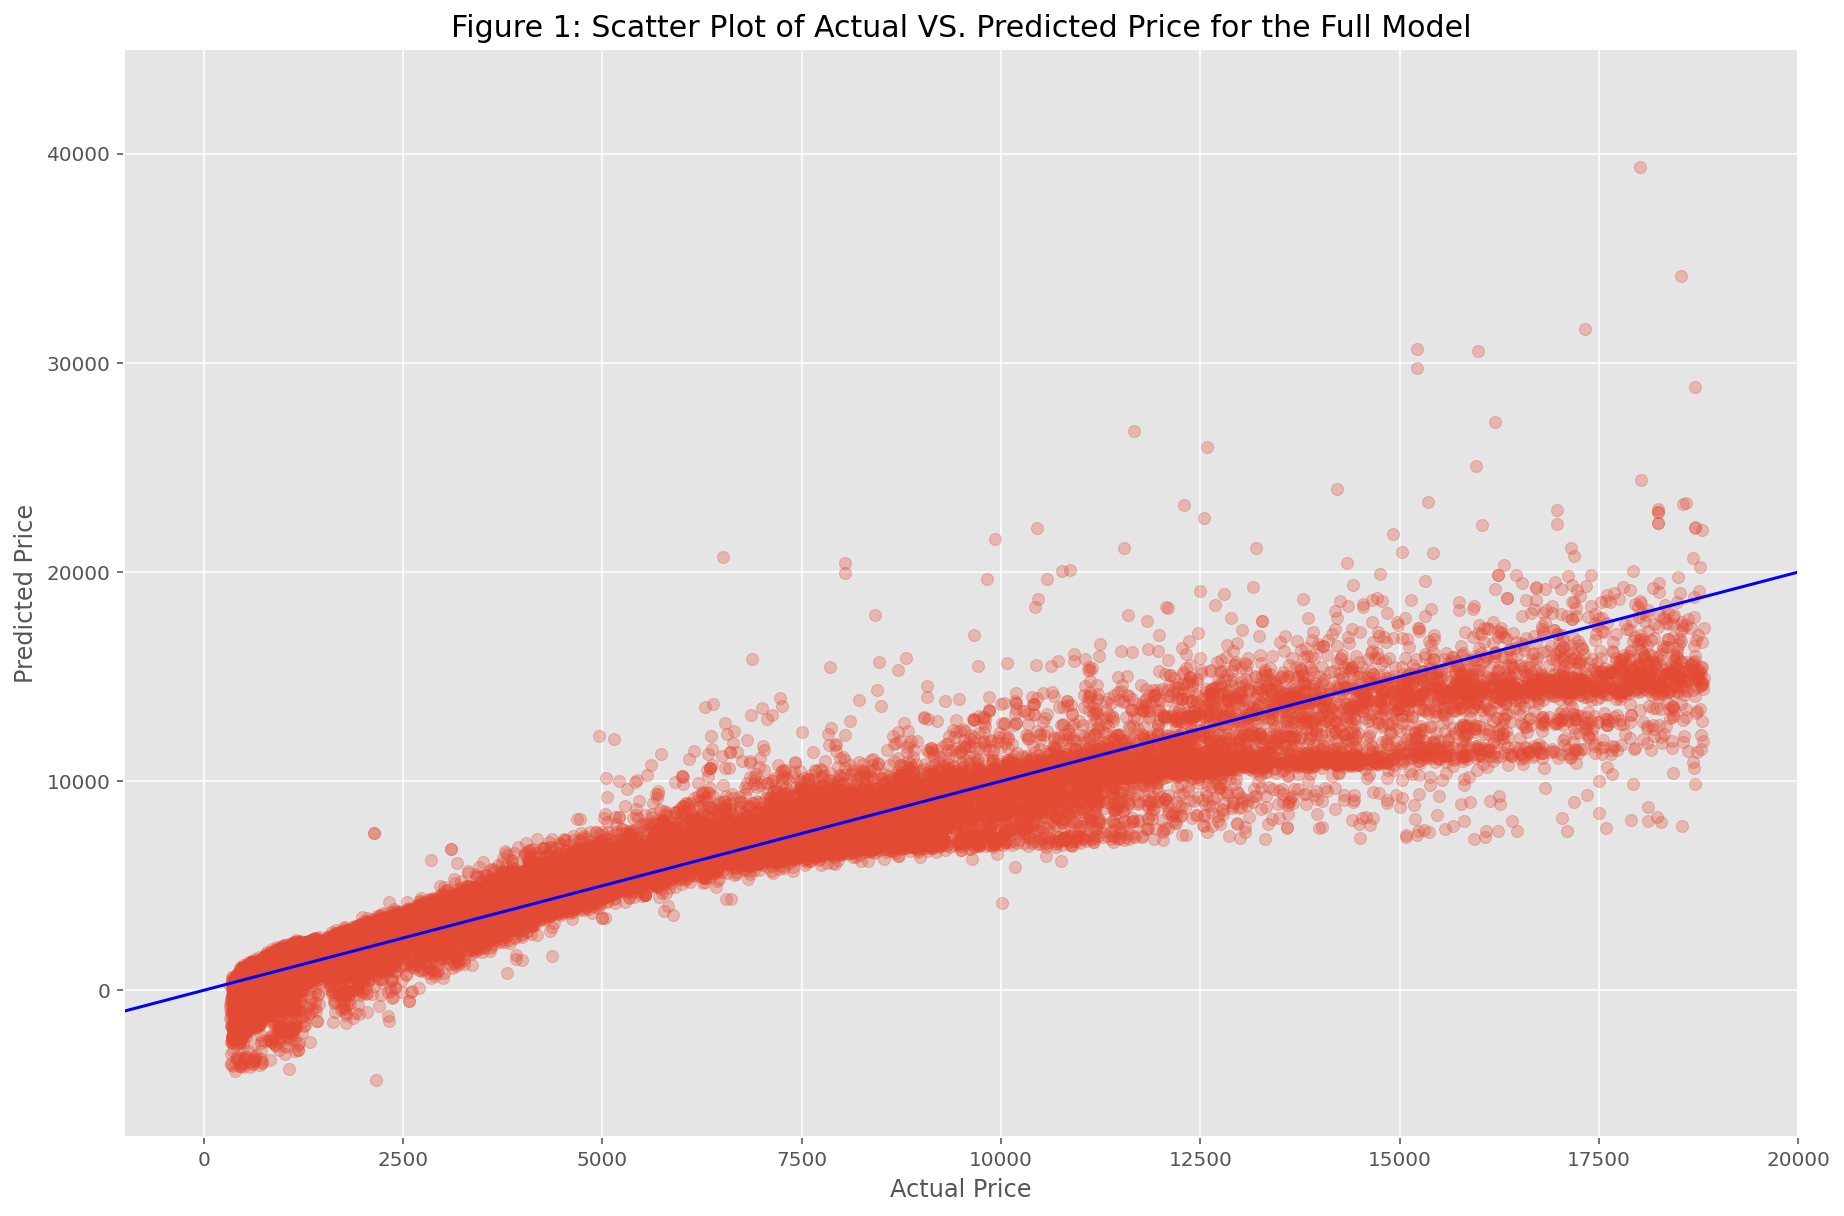

In [98]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3)
plt.xlim(-1000, 20000)
plt.ylim(-7000, 45000)
plot_line(axis=plt.gca(), slope=1, intercept=0, c="blue")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Figure 1: Scatter Plot of Actual VS. Predicted Price for the Full Model', fontsize=15)
plt.show()

<h4>Full Model Diagnostic Checks</h4>

<h4>Backward Feature Selection</h4>

<h4>Reduced Model Overview</h4>

<h4>Reduced Model Diagnostic Checks</h4>

<h3><b>Critique and Limitations</b></h3>

<h3><b>Summary and Conclusions</b></h3>
<h4>Project Summary</h4>

<h4>Summary of Findings</h4>

<h4>Conclusions</h4>